### Dobrodošli v programu za analizo vprašanj na strani math.stackexchange.com. 



Pred vami je datoteka z analizo. Za uporabo morate le pognati vsako okence s kodo. Da vam prikrajšam čas, sem vprašanja že shranil in vam zato prvega okenca ni potrebno poganjati. V ta namen sem zakomentiral funkcijo.

Za začetek bi lahko z njihove strani shranili nekaj vprašanj v CSV datoteko. V ta namen bi pognali naslednje okence s kodo.

In [1]:
from Shranjevanje_podatkov import shrani_vprasanja_v_CSV

ime_CSV_datoteke_za_analizo = "Vprasanja.csv"
ime_mape_za_analizo = "Analiza"
število_strani_za_analizo = ""
filter_za_analizo = "Votes"

# shrani_vprasanja_v_CSV(ime_CSV_datoteke_za_analizo, ime_mape_za_analizo, število_strani_za_analizo, filter_za_analizo)

Pojaviti bi se morala mapa z želenim imenom, v njej pa nas bi morali pričakati CSV datoteki z vprašanji in oznakami. 

Za ogrevanje si najprej oglejmo, koliko vprašanj je na celotnem forumu.

In [2]:
from Izluscevanje_podatkov import izlusci_stevilo_vseh_vprasanj_in_vseh_strani
izlusci_stevilo_vseh_vprasanj_in_vseh_strani()[0]

'1,598,393'

Začnimo z analizo shranjenih podatkov. V prvem korako bomo s pomočjo knjižnice Pandas ustvarili razpredelnico(DataFrame). Ker nas bodo v bodoče zanimale tudi oznake, shranimo v razpredelnico tudi te.

In [3]:
import pandas as pd
import os


VPRASANJA = pd.read_csv(os.path.join(ime_mape_za_analizo,ime_CSV_datoteke_za_analizo), index_col="Id", parse_dates=["Datum in ura"])
OZNAKE = pd.read_csv(os.path.join(ime_mape_za_analizo,ime_CSV_datoteke_za_analizo[:-4] + "_oznake.csv"))
VPRASANJA


,Ime,Opomba,Glasovi,Odgovori,Sprejet odgovor,Ogledi,Datum in ura
Id,,,,,,,
733754,Visually stunning math concepts which are easy...,Odprt,1595,87,Ne,593763,NaT
21199,Is $\frac{\textrm{d}y}{\textrm{d}x}$ not a ratio?,Odprt,1270,26,Da,136634,2011-02-09 16:23:43
379927,How long will it take Marie to saw another boa...,Odprt,1086,32,Da,152137,2013-05-03 03:31:47
71874,Can I use my powers for good?,Zaprt,920,29,Ne,97541,NaT
12906,"The staircase paradox, or why $\pi\ne4$",Odprt,878,22,Da,110782,2010-12-03 13:44:56
...,...,...,...,...,...,...,...
4753733,"Given three intersecting planes, find the line...",Odprt,0,1,Da,44,2023-08-16 07:16:17
4753732,What permits us to compare the terms here?,Duplikat,0,1,Ne,30,2023-08-16 07:14:07
4753730,Asymptotics of $\displaystyle{\sum_{i=0}^n\sqr...,Odprt,2,0,Ne,52,2023-08-16 07:04:20


Če želimo preveriti koliko vprašanj smo shranili:

In [4]:
VPRASANJA.shape[0]

496900

Shranjena vprašanja lahko sedaj razvrstimo po številu glasov, da vidimo, katero je najbolj priljubljeno.

In [5]:
VPRASANJA.sort_values(by=["Glasovi"], ascending=False)

,Ime,Opomba,Glasovi,Odgovori,Sprejet odgovor,Ogledi,Datum in ura
Id,,,,,,,
733754,Visually stunning math concepts which are easy...,Odprt,1595,87,Ne,593763,NaT
21199,Is $\frac{\textrm{d}y}{\textrm{d}x}$ not a ratio?,Odprt,1270,26,Da,136634,2011-02-09 16:23:43
379927,How long will it take Marie to saw another boa...,Odprt,1086,32,Da,152137,2013-05-03 03:31:47
71874,Can I use my powers for good?,Zaprt,920,29,Ne,97541,NaT
12906,"The staircase paradox, or why $\pi\ne4$",Odprt,878,22,Da,110782,2010-12-03 13:44:56
...,...,...,...,...,...,...,...
4753794,show that: $cd - c - d = (c - 1)(d - 1) - 1$,Odprt,-2,1,Da,45,2023-08-16 09:55:25
4753777,Liouville&#39;s equation: a Cauchy problem.,Odprt,-3,0,Ne,20,2023-08-16 09:30:32
4753729,How many functions f : A →B exist?,Odprt,-4,0,Ne,20,2023-08-16 07:03:02


Opazimo, da ne vidimo celotnega vprašanja, zato si ga oglejmo pobliže.

In [6]:
VPRASANJA.loc[733754, "Ime"]

'Visually stunning math concepts which are easy to explain'

Oglejmo si, kakšne ozanke je avtor podelil temu vprašanju.

In [7]:
OZNAKE[OZNAKE["Id"] == 733754]

,Id,Oznaka
0,733754,soft-question
1,733754,recreational-mathematics
2,733754,education
3,733754,big-list
4,733754,visualization


Poglejmo, katere izmed oznak se pojavljajo največkrat.

In [8]:
po_oznakah = OZNAKE.groupby(by = ["Oznaka"])["Oznaka"].size()
po_oznakah.sort_values(ascending=False, inplace=True)
po_oznakah.head(3)

Oznaka
real-analysis     47064
calculus          42206
linear-algebra    33915
Name: Oznaka, dtype: int64

Oglejmo si graf, ki nam bo pokazal povezavo med stevilom odgovorov in stevilom vprasanj:


<Axes: xlabel='Odgovori', ylabel='količina vprašanj'>

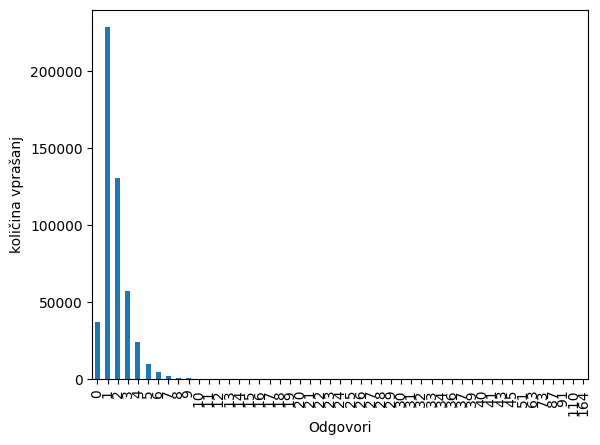

In [9]:
po_odgovorih = VPRASANJA.groupby(by = "Odgovori").size()
po_odgovorih.plot.bar(ylabel = "količina vprašanj")

Da bomo lahko dejansko kaj prebrali, uporabimo na y osi logaritemsko skalo.

<Axes: xlabel='Odgovori', ylabel='količina vprašanj'>

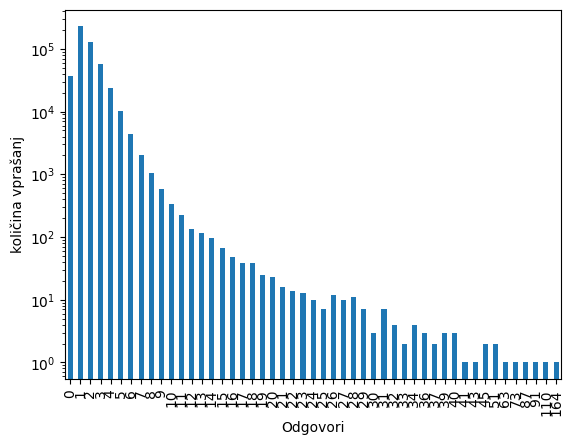

In [10]:
po_odgovorih.plot.bar(ylabel = "količina vprašanj", logy = True)

Oglejmo si, če obstaja kakšna povezava med številom odgovorov in glasov.

<Axes: xlabel='Glasovi', ylabel='Odgovori'>

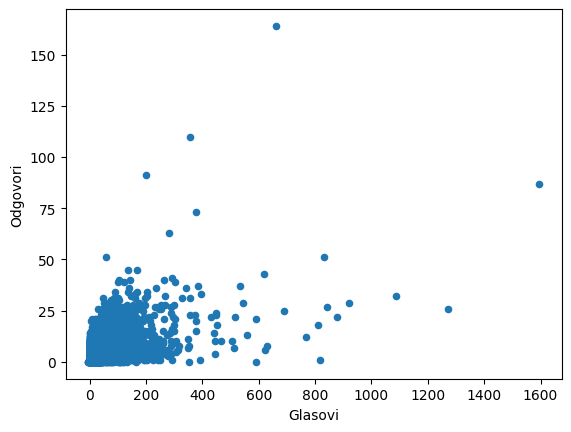

In [11]:
VPRASANJA.plot.scatter('Glasovi','Odgovori')

Mogoče nas zanima na kateri dan v tednu je bilo objavljeno kakšno vprašanje. 

In [12]:
from Pomozne_funkcije import prevedi


VPRASANJA["Dan v Tednu"] = VPRASANJA["Datum in ura"].dt.day_name()
VPRASANJA["Dan v Tednu"] = VPRASANJA["Dan v Tednu"].map(prevedi)
VPRASANJA

,Ime,Opomba,Glasovi,Odgovori,Sprejet odgovor,Ogledi,Datum in ura,Dan v Tednu
Id,,,,,,,,
733754,Visually stunning math concepts which are easy...,Odprt,1595,87,Ne,593763,NaT,None
21199,Is $\frac{\textrm{d}y}{\textrm{d}x}$ not a ratio?,Odprt,1270,26,Da,136634,2011-02-09 16:23:43,Sreda
379927,How long will it take Marie to saw another boa...,Odprt,1086,32,Da,152137,2013-05-03 03:31:47,Petek
71874,Can I use my powers for good?,Zaprt,920,29,Ne,97541,NaT,None
12906,"The staircase paradox, or why $\pi\ne4$",Odprt,878,22,Da,110782,2010-12-03 13:44:56,Petek
...,...,...,...,...,...,...,...,...
4753733,"Given three intersecting planes, find the line...",Odprt,0,1,Da,44,2023-08-16 07:16:17,Sreda
4753732,What permits us to compare the terms here?,Duplikat,0,1,Ne,30,2023-08-16 07:14:07,Sreda
4753730,Asymptotics of $\displaystyle{\sum_{i=0}^n\sqr...,Odprt,2,0,Ne,52,2023-08-16 07:04:20,Sreda


Ali je mad dnevi v tednu in vprašanji kakšna korelacija?

<Axes: >

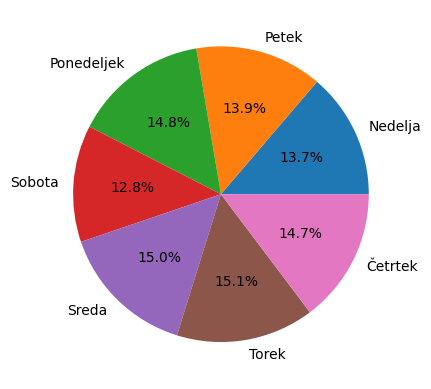

In [13]:
dnevi = VPRASANJA["Dan v Tednu"].apply(lambda x: len(str(x)) >4)
VPRASANJA[dnevi].groupby("Dan v Tednu").size().plot.pie(autopct='%1.1f%%')

Za koliko vprašanj pa nam ni uspelo izluščiti datuma?


In [14]:
ne_dnevi = VPRASANJA["Dan v Tednu"].isna()
VPRASANJA[ne_dnevi].shape[0]

1056

Oglejmo si še najbolj zgodno in najbolj pozno vprašanje med prenesenimi.

In [15]:
print(VPRASANJA["Datum in ura"].min())
print(VPRASANJA["Datum in ura"].max())

2010-03-27 14:33:20
2023-08-16 14:17:42


Koliko časa je minilo med njima?

In [16]:
VPRASANJA["Datum in ura"].max() - VPRASANJA["Datum in ura"].min()

Timedelta('4889 days 23:44:22')

Za konec si še oglejmo koliko vprašanj ima sprejet odgovor in koliko med njimi ima opombe.


<Axes: >

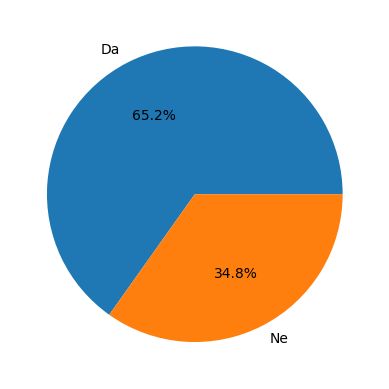

In [17]:
VPRASANJA.groupby(by = "Sprejet odgovor").size().plot.pie(autopct='%1.1f%%')

<Axes: >

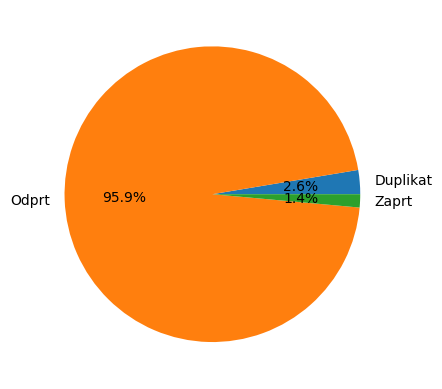

In [18]:
VPRASANJA.groupby(by = "Opomba").size().plot.pie(autopct='%1.1f%%')

In [19]:
print(f"""Izluščili smo {VPRASANJA[VPRASANJA["Opomba"] == "Zaprt"].shape[0]} zaprtih vprašanj in """
f"""{VPRASANJA[VPRASANJA["Opomba"] == "Duplikat"].shape[0]} duplikatov.""")

Izluščili smo 7163 zaprtih vprašanj in 13054 duplikatov.
